In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath)

Verify loading by displaying the dataframe summary using `dataframe.info()`


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


View the first 5 values of the updated dataframe using `dataframe.head()`


In [5]:

# df.drop(columns='Unnamed: 0',axis=1,inplace=True)



Note that we can update the `Screen_Size_cm` column such that all values are rounded to nearest 2 decimal places by using `numpy.round()`


In [6]:
df['Screen_Size_cm']=np.round(df['Screen_Size_cm'],2)


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data. 


Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

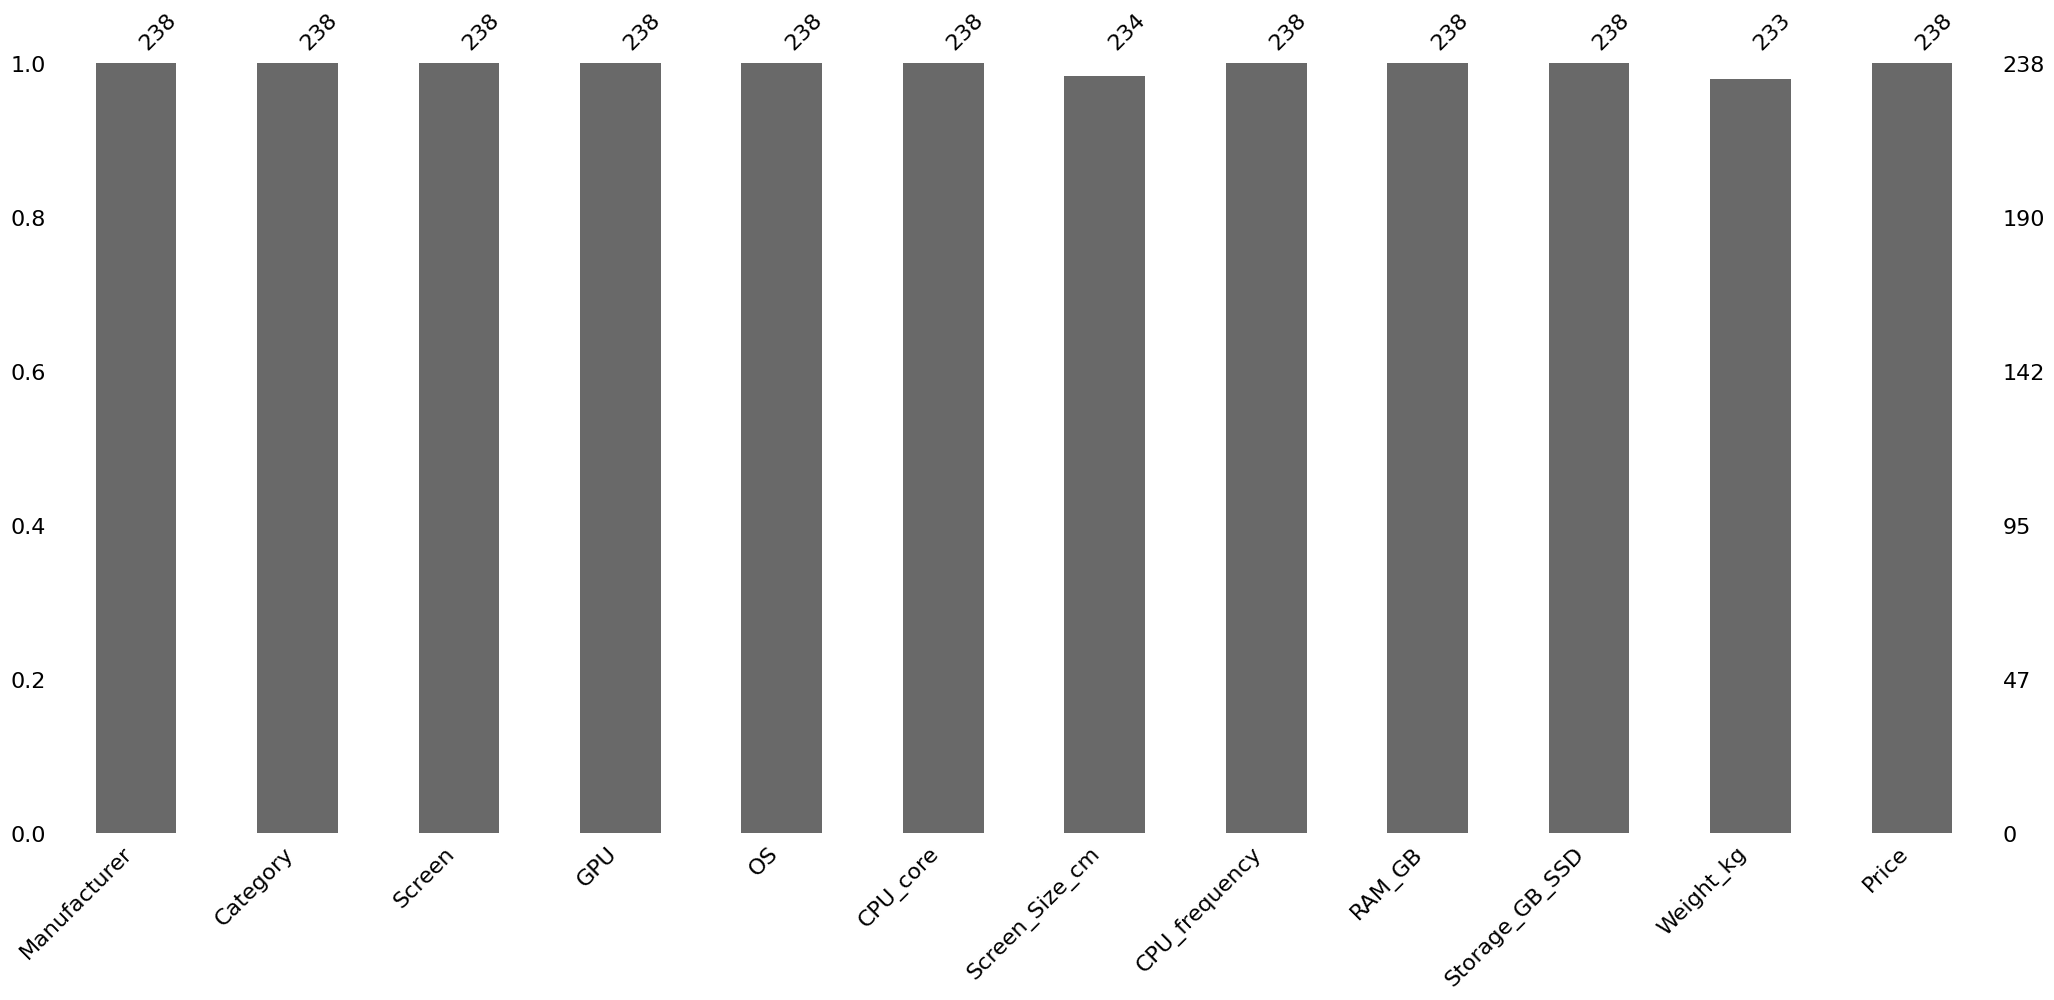

In [7]:
import missingno as mso

mso.bar(df)
df.isnull().sum()





In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

In [9]:
mean_wei=df["Weight_kg"].mean()
df['Weight_kg']=df['Weight_kg'].fillna(mean_wei)
df['Weight_kg'] = np.round(df['Weight_kg'],2) 
# ----------------------------------
screen=df["Screen_Size_cm"].mode()[0]
df['Screen_Size_cm']=df['Screen_Size_cm'].fillna(screen)


 
# df.head(10)
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  238 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       238 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB


# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [29]:
# df['Screen_Size_inches'] = df['Screen_Size_cm']/2.54
# df.drop(columns='Screen_Size_cm',inplace=True)

# df['Weight_kg']=df['Weight_kg']*2.205
# df.rename(columns={'Weight_kg':'weight_pounds'},inplace=True)
df['Screen_Size_inches']=df['Screen_Size_inches'].round(2)
df['weight_pounds']=df['weight_pounds'].round(2)
df.head(10)


,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,weight_pounds,Price,Screen_Size_inches
0,Acer,4,IPS Panel,2,1,5,1.6,8,256,7.78,978,14.0
1,Dell,3,Full HD,1,1,3,2.0,4,256,10.70,634,15.6
2,Dell,3,Full HD,1,1,7,2.7,8,256,10.70,946,15.6
3,Dell,4,IPS Panel,2,1,5,1.6,8,128,5.93,1244,13.3
4,HP,4,Full HD,2,1,7,1.8,8,256,9.29,837,15.6
5,Dell,3,Full HD,1,1,5,1.6,8,256,10.70,1016,15.6
6,HP,3,Full HD,3,1,5,1.6,8,256,10.21,1117,15.6
7,Acer,3,IPS Panel,2,1,5,1.6,4,256,10.70,866,15.0
8,Dell,3,Full HD,1,1,5,2.5,4,256,11.18,812,15.6
9,Acer,3,IPS Panel,3,1,7,1.8,8,256,10.70,1068,15.0


### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [30]:

df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()


# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [37]:

bins= np.linspace(min(df["Price"]),max(df['Price']),4)
lables=['low','medium','high']
df['Price-binned'] = pd.cut(df['Price'], bins=bins, labels=lables, include_lowest=True)
df.head(10)


,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,weight_pounds,Price,Screen_Size_inches,Price-binned
0,Acer,4,IPS Panel,2,1,5,0.551724,8,256,7.78,978,14.0,low
1,Dell,3,Full HD,1,1,3,0.689655,4,256,10.70,634,15.6,low
2,Dell,3,Full HD,1,1,7,0.931034,8,256,10.70,946,15.6,low
3,Dell,4,IPS Panel,2,1,5,0.551724,8,128,5.93,1244,13.3,low
4,HP,4,Full HD,2,1,7,0.620690,8,256,9.29,837,15.6,low
5,Dell,3,Full HD,1,1,5,0.551724,8,256,10.70,1016,15.6,low
6,HP,3,Full HD,3,1,5,0.551724,8,256,10.21,1117,15.6,low
7,Acer,3,IPS Panel,2,1,5,0.551724,4,256,10.70,866,15.0,low
8,Dell,3,Full HD,1,1,5,0.862069,4,256,11.18,812,15.6,low
9,Acer,3,IPS Panel,3,1,7,0.620690,8,256,10.70,1068,15.0,low


Text(0.5, 1.0, 'Distribution of Prices in Bins')

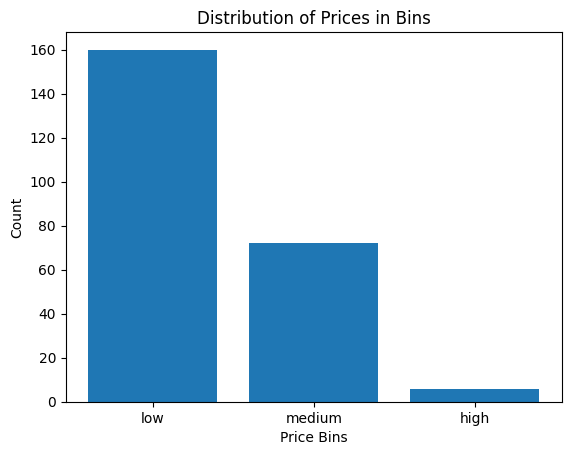

In [40]:
bin_counts = df['Price-binned'].value_counts()

plt.bar(bin_counts.index.astype(str), bin_counts.values)
plt.xlabel("Price Bins")
plt.ylabel("Count")
plt.title("Distribution of Prices in Bins")
# print(bin_counts)


# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [41]:
df.head(20)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,weight_pounds,Price,Screen_Size_inches,Price-binned
0,Acer,4,IPS Panel,2,1,5,0.551724,8,256,7.78,978,14.0,low
1,Dell,3,Full HD,1,1,3,0.689655,4,256,10.70,634,15.6,low
2,Dell,3,Full HD,1,1,7,0.931034,8,256,10.70,946,15.6,low
3,Dell,4,IPS Panel,2,1,5,0.551724,8,128,5.93,1244,13.3,low
4,HP,4,Full HD,2,1,7,0.620690,8,256,9.29,837,15.6,low
5,Dell,3,Full HD,1,1,5,0.551724,8,256,10.70,1016,15.6,low
6,HP,3,Full HD,3,1,5,0.551724,8,256,10.21,1117,15.6,low
7,Acer,3,IPS Panel,2,1,5,0.551724,4,256,10.70,866,15.0,low
8,Dell,3,Full HD,1,1,5,0.862069,4,256,11.18,812,15.6,low
9,Acer,3,IPS Panel,3,1,7,0.620690,8,256,10.70,1068,15.0,low


In [51]:
# df["Screen-IPS_panel"]= (df['Screen']== "IPS Panel").astype(int)
# df['Screen-Full_HD'] = (df['Screen'] == "Full HD").astype(int)
# df.drop(columns='Screen',inplace=True)
df.head(30)

,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,weight_pounds,Price,Screen_Size_inches,Price-binned,Screen-IPS_panel,Screen-Full_HD
0,Acer,4,2,1,5,0.551724,8,256,7.78,978,14.0,low,1,0
1,Dell,3,1,1,3,0.689655,4,256,10.70,634,15.6,low,0,1
2,Dell,3,1,1,7,0.931034,8,256,10.70,946,15.6,low,0,1
3,Dell,4,2,1,5,0.551724,8,128,5.93,1244,13.3,low,1,0
4,HP,4,2,1,7,0.620690,8,256,9.29,837,15.6,low,0,1
5,Dell,3,1,1,5,0.551724,8,256,10.70,1016,15.6,low,0,1
6,HP,3,3,1,5,0.551724,8,256,10.21,1117,15.6,low,0,1
7,Acer,3,2,1,5,0.551724,4,256,10.70,866,15.0,low,1,0
8,Dell,3,1,1,5,0.862069,4,256,11.18,812,15.6,low,0,1
9,Acer,3,3,1,7,0.620690,8,256,10.70,1068,15.0,low,1,0


<details>
    <summary>Click here for Solution</summary>

```python
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)
```

</details>
